# Small scale testing

In [1]:
train_dataset_path = 'small-training/train/'
val_dataset_path = 'small-training/validation/'
test_dataset_path = 'small-training/test/'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os

from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Convolution2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.losses import BinaryCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, ResNet50
from keras import applications

from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping


2023-11-06 21:17:23.290472: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Assuming you have an SRGAN generator named srgan() and other necessary variables defined

def custom_image_generator(batch_size, srgan, image_paths, image_size):
    while True:
        batch_paths = np.random.choice(a=image_paths, size=batch_size)
        batch_input = []
        batch_output = []
        for input_path in batch_paths:
            input_image = load_and_preprocess_image(input_path, image_size)  # You need to define this function
            output_image = srgan.predict(input_image)  # Assuming srgan is a functional Keras model
            batch_input += [input_image]
            batch_output += [output_image]
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output)
        yield batch_x, batch_y

# Example usage
# Assuming you have the paths to your training images in image_paths and the image size as image_size

batch_size = 32  # Define your batch size
test_data_generator = custom_image_generator(batch_size, srgan, image_paths, image_size)

NameError: name 'srgan' is not defined

## Training SRGAN

Found 20000 validated image filenames belonging to 2 classes.


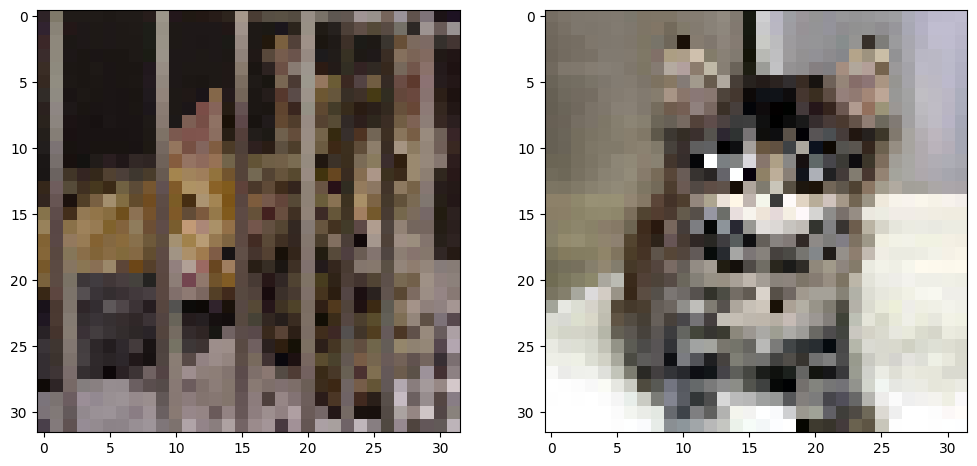

1


In [8]:
# Define the image data generator without augmentations
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Specify the directory containing the images
train_directory = DirPath + 'Assignment-1/Datasets2/train/'  # Replace with the actual path to the training directory

# Generate batches of data from the dataframe without augmentations
train_generator = train_datagen.flow_from_dataframe(dataframe= df_train,
                                                      directory= train_directory,  # Replace with the actual path to the image directory
                                                      x_col='Filename',
                                                      y_col='Class',
                                                      target_size=(32, 32),
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      shuffle=False)

# Visualize 2 images from the batch
images, labels = next(train_generator)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('on')
plt.show()
print(i)


Found 2500 validated image filenames belonging to 2 classes.


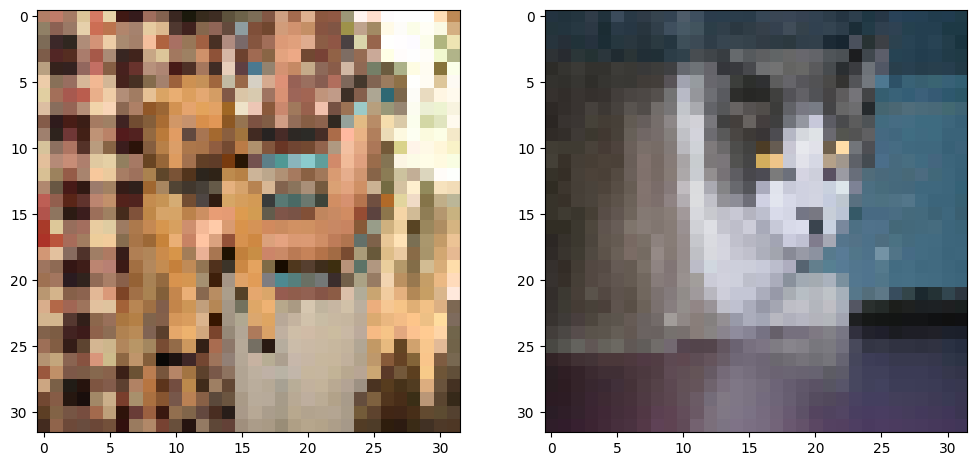

1


In [9]:
# Generate batches of data from the dataframe without augmentations

# Specify the directory containing the images
val_directory = DirPath + 'Assignment-1/Datasets2/validation/'

validation_generator = train_datagen.flow_from_dataframe(
    dataframe= df_val,
    directory= val_directory,  # Replace with the actual path to the image directory
    x_col='Filename',
    y_col='Class',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Visualize 2 images from the batch
images, labels = next(validation_generator)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('on')
plt.show()
print(i)

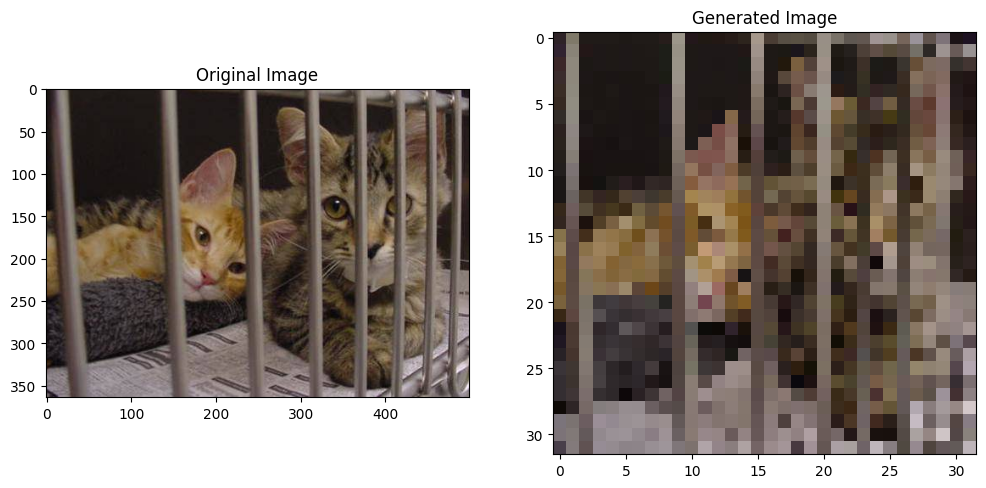

In [10]:
from PIL import Image

# Get the file paths and labels from the batch
file_paths = train_generator.filepaths
labels = train_generator.labels

# Load and display the original and generated images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
original_image = Image.open(file_paths[0])
generated_image = train_generator[0][0][0]  # retrieve the first image from the batch

axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('on')

axes[1].imshow(generated_image)
axes[1].set_title('Generated Image')
axes[1].axis('on')

plt.show()


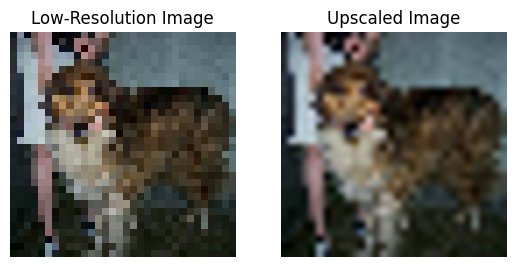

In [17]:
import tensorflow as tf

# Fetch one image from the image generator
low_res_image = train_generator[1][0][0]

# Define the upsample_images function
def upsample_images(images, target_size=(128, 128)):
    upscaled_images = tf.image.resize(images, target_size, method=tf.image.ResizeMethod.BICUBIC)
    return upscaled_images

# Upsample the low-resolution image to 128 x 128
upscaled_image = upsample_images(low_res_image, target_size=(128, 128))

# Plot the original and upscaled images
plt.subplot(1, 2, 1)
plt.title('Low-Resolution Image')
plt.imshow(tf.squeeze(low_res_image))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Upscaled Image')
plt.imshow(tf.squeeze(upscaled_image))
plt.axis('off')

plt.show()

In [28]:
import numpy as np

# Assuming you have an image generator named 'image_generator' set up already
# Fetch one image from the image generator

# Define the number of training and testing samples
num_training_samples = 1
num_testing_samples = 200

# Initialize empty arrays for training and testing images
train_lr, train_hr = [], []
test_lr, test_hr = [], []

# Generate training and testing image arrays from the image generator
for i in range(num_training_samples):
    batch = next(train_generator)
    for j in range(32):
      low_res_images = batch[i][0][j]
      high_res_images = Image.open(file_paths[j])
      img_array = np.asarray(high_res_images)
      train_lr.append(low_res_images)
      train_hr.append(img_array)


# Convert the lists to numpy arrays
train_lr = np.array(train_lr)
train_hr = np.array(train_hr)


# Normalize the arrays between 0 and 1
train_lr = train_lr / 255.0
train_hr = train_hr / 255.0


# Check the shapes of the arrays
print("Training Low-Res Shape:", train_lr.shape)
print("Training High-Res Shape:", train_hr.shape)



Training Low-Res Shape: (32, 32, 3)
Training High-Res Shape: (32,)


<ipython-input-28-5c3451aa93e6>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_hr = np.array(train_hr)


In [ ]:
print(train_lr)

In [ ]:
# Print one image from the array
plt.imshow(train_lr[0])  # Change the index as needed
plt.title("Sample Low-Res Image")
plt.show()
plt.imshow(train_hr[0])  # Change the index as needed
plt.title("Sample Low-Res Image")
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

# Define the generator architecture
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2D(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 32, 32, 3)

    return model

# Define the discriminator architecture
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

# Create instances of the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Define the SRGAN model
def build_srgan(generator, discriminator):
    sr_model = tf.keras.Sequential()
    sr_model.add(generator)
    discriminator.trainable = False  # Make sure the discriminator is not trainable in the combined model
    sr_model.add(discriminator)
    return sr_model

srgan = build_srgan(generator, discriminator)

# Compile the SRGAN model
srgan.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')
srgan.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 32, 32, 3)         2733504   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 217985    
                                                                 
Total params: 2951489 (11.26 MB)
Trainable params: 2700352 (10.30 MB)
Non-trainable params: 251137 (981.00 KB)
_________________________________________________________________


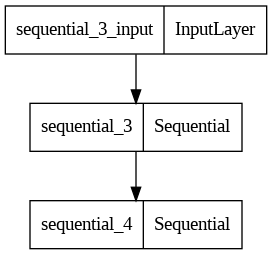

In [22]:
tf.keras.utils.plot_model(srgan)

In [ ]:
# Define your image generator
# ...

# Define your SRGAN architecture and compile it
# ...
epochs = 2
num_steps = 2
# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}")
    for step in range(num_steps):
        # Generate a batch of low-resolution images using the image generator
        low_res_images = next(train_generator)
        #low_res_image = train_generator[0][0][step]
        # Upsample low-resolution images to 128 x 128 using your preferred method
        #upscaled_image = upsample_images(low_res_image, target_size=(128, 128))

        # Generate high-resolution images from the low-resolution inputs using the SRGAN model
        generated_images = srgan(low_res_images)

        # Train the discriminator
        real_labels = tf.ones((len(low_res_images), 1))
        fake_labels = tf.zeros((len(low_res_images), 1))

        with tf.GradientTape() as tape:
            real_loss = losses.binary_crossentropy(real_labels, discriminator(high_res_images))
            fake_loss = losses.binary_crossentropy(fake_labels, discriminator(generated_images))
            total_discriminator_loss = real_loss + fake_loss

        gradients_of_discriminator = tape.gradient(total_discriminator_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as tape:
            adversarial_loss = losses.binary_crossentropy(real_labels, discriminator(high_res_images))
            content_loss = losses.mean_absolute_error(high_res_images, generated_images)
            total_generator_loss = content_loss + 1e-3 * adversarial_loss

        gradients_of_generator = tape.gradient(total_generator_loss, srgan.trainable_variables)
        srgan_optimizer.apply_gradients(zip(gradients_of_generator, srgan.trainable_variables))

        # Print the progress
        if step % 100 == 0:
            print(f"Epoch {epoch + 1}, Step {step}, Generator Loss: {float(total_generator_loss)}, Discriminator Loss: {float(total_discriminator_loss)}")


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
import tensorflow_datasets as tfds
import tqdm
import os
import shutil
import re
import cv2
import time
import logging

In [7]:
class TqdmLoggingHandler(logging.Handler):
    def __init__(self, level=logging.NOTSET):
        super().__init__(level)

    def emit(self, record):
        try:
            msg = self.format(record)
            tqdm.tqdm.write(msg)
            self.flush()
        except (KeyboardInterrupt, SystemExit):
            raise
        except:
            self.handleError(record)  
log = logging.getLogger(__name__)
log.setLevel(logging.INFO)
log.addHandler(TqdmLoggingHandler())

In [8]:
import numpy as np
from keras import Model
from keras.layers import Conv2D, PReLU, BatchNormalization, Flatten
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add

In [32]:
# Load the 'cats_vs_dogs' dataset
ds, info = tfds.load('cats_vs_dogs', split='train', with_info=True)

# Define the map function to modify the feature structure
def map_function(data):
    modified_data = {
        'image': data['image'],
        'label': tf.one_hot(data['label'], depth=5)  # Modify the label feature as required
    }
    return modified_data

# Apply the map function to the dataset
modified_ds = ds.map(map_function)

# Split the modified dataset into training and testing subsets
train_data = modified_ds.skip(600)
test_data = modified_ds.take(600)


# Check the datasets
for data in train_data.take(1):
    print("Training Data:", data)

for data in test_data.take(1):
    print("Testing Data:", data)


Training Data: {'image': <tf.Tensor: shape=(374, 277, 3), dtype=uint8, numpy=
array([[[ 43,  36,  30],
        [ 43,  36,  30],
        [ 42,  35,  29],
        ...,
        [  7,   7,   7],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[ 38,  31,  25],
        [ 38,  31,  25],
        [ 38,  31,  25],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[ 36,  29,  23],
        [ 37,  30,  24],
        [ 38,  31,  25],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]],

       ...,

       [[200, 200, 192],
        [202, 202, 194],
        [201, 201, 193],
        ...,
        [150, 149, 147],
        [146, 145, 143],
        [149, 148, 144]],

       [[175, 175, 167],
        [175, 175, 167],
        [173, 173, 165],
        ...,
        [145, 144, 142],
        [139, 138, 136],
        [139, 138, 134]],

       [[178, 178, 170],
        [174, 174, 166],
        [168, 168, 160],
        .

In [28]:
tqdm.tqdm(train_data)

  0%|          | 0/22662 [00:00<?, ?it/s]

In [12]:
@tf.function
def build_data(data):
  cropped=tf.dtypes.cast(tf.image.random_crop(data['image'] / 255,(128,128,3)),tf.float32)

  lr=tf.image.resize(cropped,(32,32))
  #lr=tf.image.resize(lr,(128,128),method=tf.image.ResizeMethod.BICUBIC)
  return (lr,cropped)

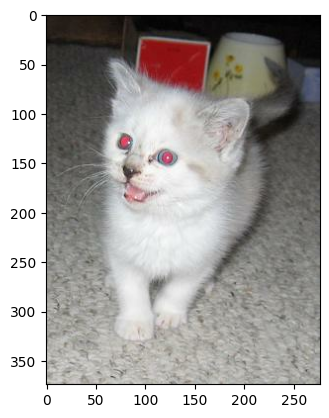

In [13]:
for x in train_data.take(1):
  plt.imshow(x['image'])
  plt.show()

In [14]:
def bicubic_interpolate(image,shape):
  img_resized=cv2.resize(image,shape, interpolation=cv2.INTER_CUBIC)
  return img_resized

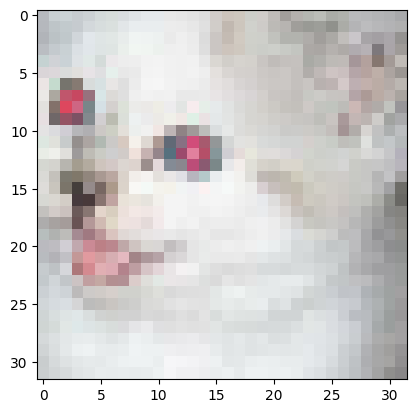

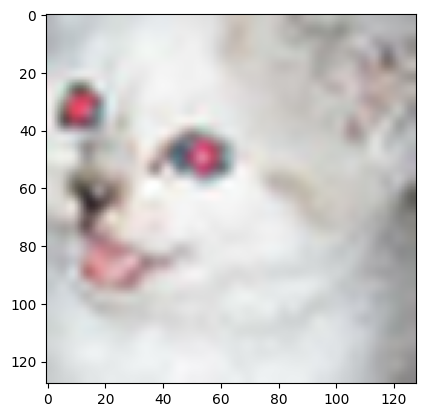

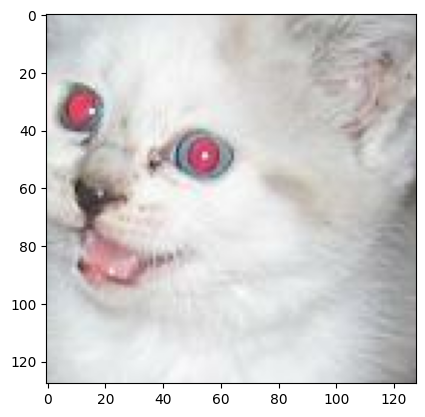

In [16]:
train_dataset_mapped = train_data.map(build_data,num_parallel_calls=tf.data.AUTOTUNE)
for x in train_dataset_mapped.take(1):
  plt.imshow(x[0].numpy())
  plt.show()

  plt.imshow(bicubic_interpolate(x[0].numpy(),(128,128)))
  plt.show()
  plt.imshow(x[1].numpy())
  plt.show()

In [17]:
def residual_block_gen(ch=64,k_s=3,st=1):
  model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(ch,k_s,strides=(st,st),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2D(ch,k_s,strides=(st,st),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
  ])
  return model

def Upsample_block(x, ch=256, k_s=3, st=1):
    x = tf.keras.layers.Conv2D(ch,k_s, strides=(st,st), padding='same')(x)
    x = tf.nn.depth_to_space(x, 2) # Subpixel pixelshuffler
    x = tf.keras.layers.LeakyReLU()(x)
    return x

input_lr=tf.keras.layers.Input(shape=(None,None,3))
input_conv=tf.keras.layers.Conv2D(64,9,padding='same')(input_lr)
input_conv=tf.keras.layers.LeakyReLU()(input_conv)

SRRes=input_conv
for x in range(5):
  res_output=residual_block_gen()(SRRes)
  SRRes=tf.keras.layers.Add()([SRRes,res_output])

SRRes=tf.keras.layers.Conv2D(64,9,padding='same')(SRRes)
SRRes=tf.keras.layers.BatchNormalization()(SRRes)

SRRes=tf.keras.layers.Add()([SRRes,input_conv])

SRRes=Upsample_block(SRRes)
SRRes=Upsample_block(SRRes)

output_sr=tf.keras.layers.Conv2D(3,9,activation='tanh',padding='same')(SRRes)

SRResnet=tf.keras.models.Model(input_lr,output_sr)

In [18]:
def residual_block_disc(ch=64,k_s=3,st=1):
  model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(ch,k_s,strides=(st,st),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
  ])
  return model

input_lr=tf.keras.layers.Input(shape=(128,128,3))
input_conv=tf.keras.layers.Conv2D(64,3,padding='same')(input_lr)
input_conv=tf.keras.layers.LeakyReLU()(input_conv)

channel_nums=[64,128,128,256,256,512,512]
stride_sizes=[2,1,2,1,2,1,2]

disc=input_conv
for x in range(7):
  disc=residual_block_disc(ch=channel_nums[x],st=stride_sizes[x])(disc)
  
disc=tf.keras.layers.Flatten()(disc)

disc=tf.keras.layers.Dense(1024)(disc)
disc=tf.keras.layers.LeakyReLU()(disc)

disc_output=tf.keras.layers.Dense(1,activation='sigmoid')(disc)

discriminator=tf.keras.models.Model(input_lr,disc_output)

In [19]:
def PSNR(y_true,y_pred):
  mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
  return 20 * log10(1 / (mse ** 0.5))

def log10(x):
  numerator = tf.math.log(x)
  denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
  return numerator / denominator

def pixel_MSE(y_true,y_pred):
  return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [20]:
VGG19=tf.keras.applications.VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))
VGG19.layers

In [21]:
VGG19=tf.keras.applications.VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

VGG_i,VGG_j=2,2
def VGG_loss(y_hr,y_sr,i_m=2,j_m=2):
  i,j=0,0
  accumulated_loss=0.0
  for l in VGG19.layers:
    cl_name=l.__class__.__name__
    if cl_name=='Conv2D':
      j+=1
    if cl_name=='MaxPooling2D':
      i+=1
      j=0
    if i==i_m and j==j_m:
      break
    
    y_hr=l(y_hr)
    y_sr=l(y_sr)
    if cl_name=='Conv2D':
      accumulated_loss+=tf.reduce_mean((y_hr-y_sr)**2) * 0.006

  return accumulated_loss
def VGG_loss_intuitive(y_true,y_pred):
  accumulated_loss=0.0
  for l in VGG19.layers:
    y_true=l(y_true)
    y_pred=l(y_pred)
    accumulated_loss+=tf.reduce_mean((y_true-y_pred)**2) * 0.006
  return accumulated_loss

In [22]:
generator_optimizer=tf.keras.optimizers.SGD(0.0001)
discriminator_optimizer=tf.keras.optimizers.SGD(0.0001)

adv_ratio=0.001
evaluate=['PSNR']
# MSE
loss_func,adv_learning = pixel_MSE,False
# VGG2.2
loss_func,adv_learning = lambda y_hr,y_sr:VGG_loss(y_hr,y_sr,i_m=2,j_m=2),False
# VGG 5.4
loss_func,adv_learning = lambda y_hr,y_sr:VGG_loss(y_hr,y_sr,i_m=5,j_m=4),False
# SRGAN-MSE
loss_func,adv_learning = pixel_MSE,True
# SRGAN-VGG 2.2
loss_func,adv_learning = lambda y_hr,y_sr:VGG_loss(y_hr,y_sr,i_m=2,j_m=2),True
# SRGAN-VGG 5.4
loss_func,adv_learning = lambda y_hr,y_sr:VGG_loss(y_hr,y_sr,i_m=5,j_m=4),True

#Real loss
loss_func,adv_learning = lambda y_hr,y_sr:VGG_loss(y_hr,y_sr,i_m=5,j_m=4),True

In [33]:
for x in range(2):
  train_dataset_mapped = train_data.map(build_data,num_parallel_calls=tf.data.AUTOTUNE).batch(64)
  val_dataset_mapped = test_data.map(build_data,num_parallel_calls=tf.data.AUTOTUNE).batch(64)
  
  for image_batch in tqdm.tqdm(train_dataset_mapped, position=0, leave=True):
    logs=train_step(image_batch,loss_func,adv_learning,evaluate,adv_ratio)
    for k in logs.keys():
      print(k,':',logs[k],end='  ')
    print()

  0%|          | 0/355 [00:00<?, ?it/s]


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} assertion failed: [Need value.shape >= size, got ] [108 108 3] [128 128 3]
	 [[{{function_node __inference_build_data_47153}}{{node random_crop/Assert/Assert}}]] [Op:IteratorGetNext] name: 

In [30]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

@tf.function()
def train_step(data,loss_func=pixel_MSE,adv_learning=True,evaluate=['PSNR'],adv_ratio=0.001):
  logs={}
  gen_loss,disc_loss=0,0

  low_resolution,high_resolution=data
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    super_resolution = SRResnet(low_resolution, training=True)
    gen_loss=loss_func(high_resolution,super_resolution)

    logs['reconstruction']=gen_loss

    if adv_learning:
      real_output = discriminator(high_resolution, training=True)
      fake_output = discriminator(super_resolution, training=True)
      
      adv_loss_g = generator_loss(fake_output) * adv_ratio
      gen_loss += adv_loss_g

      disc_loss = discriminator_loss(real_output, fake_output)
      
      logs['adv_g']=adv_loss_g
      logs['adv_d']=disc_loss

  gradients_of_generator = gen_tape.gradient(gen_loss, SRResnet.trainable_variables)
  generator_optimizer.apply_gradients(zip(gradients_of_generator, SRResnet.trainable_variables))

  if adv_learning:
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
  for x in evaluate:
    if x=='PSNR':
      logs[x]=PSNR(high_resolution,super_resolution)

  return logs

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

# Define the generator architecture
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2D(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 32, 32, 3)

    return model

# Define the discriminator architecture
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

# Create instances of the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Define the SRGAN model
def build_srgan(generator, discriminator):
    sr_model = tf.keras.Sequential()
    sr_model.add(generator)
    discriminator.trainable = False  # Make sure the discriminator is not trainable in the combined model
    sr_model.add(discriminator)
    return sr_model

srgan = build_srgan(generator, discriminator)

# Compile the SRGAN model
srgan.compile(optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')
srgan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         2733504   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 217985    
                                                                 
Total params: 2951489 (11.26 MB)
Trainable params: 2700352 (10.30 MB)
Non-trainable params: 251137 (981.00 KB)
_________________________________________________________________


In [11]:
srgan(train_data)

TypeError: Inputs to a layer should be tensors. Got '<_SkipDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(5,), dtype=tf.float32, name=None)}>' (of type <class 'tensorflow.python.data.ops.skip_op._SkipDataset'>) as input for layer 'sequential_2'.